Categorical columns detected: ['municipality_name', 'object_type_name']
Training completed: Ordinary Least Squares (OLS).

Evaluation Metrics:
- Mean Squared Error: 149210817251.87
- R-squared: 0.4857
- Adjusted R-squared: 0.0884


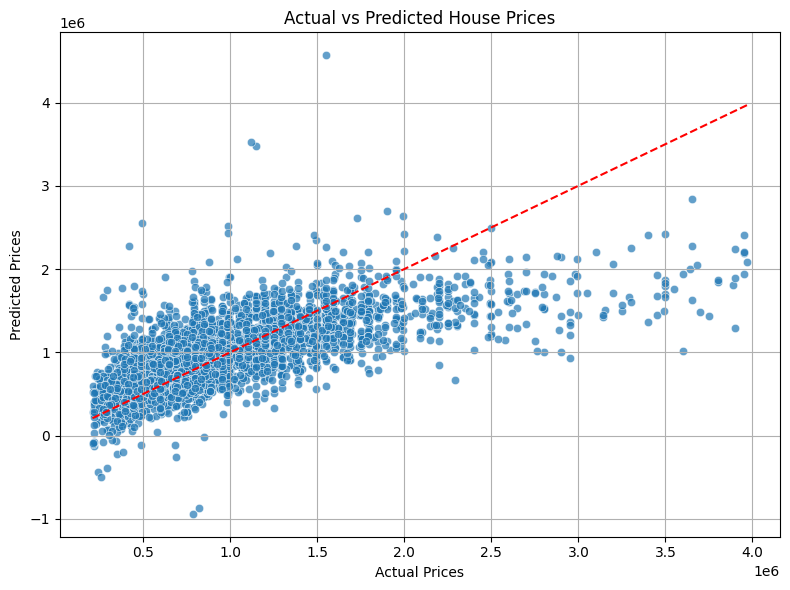

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# =======================
# Load Data
# =======================
DATA_FILE = 'house_data.csv'

try:
    house_data = pd.read_csv(DATA_FILE)
except FileNotFoundError:
    print(f"File '{DATA_FILE}' not found.")
    exit(1)

# =======================
# Data Preprocessing
# =======================
# Drop rows with missing values
clean_data = house_data.dropna()

# Identify categorical features
categorical_cols = clean_data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns detected: {categorical_cols}")

# Perform one-hot encoding if necessary
if categorical_cols:
    clean_data = pd.get_dummies(clean_data, columns=categorical_cols, drop_first=True)

# Ensure the target column 'price' exists
if 'price' not in clean_data.columns:
    raise KeyError("'price' column not found in the dataset.")

# Feature matrix (X) and target vector (y)
X = clean_data.drop(columns=['price'])
y = clean_data['price']

# Confirm that all features are numeric
remaining_object_cols = X.select_dtypes(include=['object']).columns.tolist()
if remaining_object_cols:
    raise ValueError(f"Non-numeric features remaining after encoding: {remaining_object_cols}")

# =======================
# Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =======================
# Model Training
# =======================
TRAINING_METHOD = 'OLS'  # Options: 'OLS' or 'GradientDescent'

if TRAINING_METHOD == 'OLS':
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Training completed: Ordinary Least Squares (OLS).")

elif TRAINING_METHOD == 'GradientDescent':
    model = SGDRegressor(
        max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42
    )
    model.fit(X_train, y_train)
    print("Training completed: Gradient Descent.")

else:
    raise ValueError("Invalid TRAINING_METHOD. Choose 'OLS' or 'GradientDescent'.")

# =======================
# Predictions
# =======================
y_predictions = model.predict(X_test)

# =======================
# Model Evaluation
# =======================
mse_score = mean_squared_error(y_test, y_predictions)
r2_val = r2_score(y_test, y_predictions)

n_samples = X_test.shape[0]
n_features = X_test.shape[1]

adj_r2 = 1 - (1 - r2_val) * ((n_samples - 1) / (n_samples - n_features - 1))

# =======================
# Output Results
# =======================
print("\nEvaluation Metrics:")
print(f"- Mean Squared Error: {mse_score:.2f}")
print(f"- R-squared: {r2_val:.4f}")
print(f"- Adjusted R-squared: {adj_r2:.4f}")

# =======================
# Visualization
# =======================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

